

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') #Using the 'No-Show Appointments' dataset 
df.head(20)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df.shape #Checking out the shape of our table

(110527, 14)

In [4]:
df.nunique() #number of unique values in each column

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
df.describe() #descriptive statistics for each column of data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning (Replace this with more specific notes!)

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.info() #Checking if there are any missing values and there are No missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:

df.dtypes #Checking if they have the correct data type

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#chaing date type
df.AppointmentDay.apply(np.datetime64)


0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
5        2016-04-29
6        2016-04-29
7        2016-04-29
8        2016-04-29
9        2016-04-29
10       2016-04-29
11       2016-04-29
12       2016-04-29
13       2016-04-29
14       2016-04-29
15       2016-04-29
16       2016-04-29
17       2016-04-29
18       2016-04-29
19       2016-04-29
20       2016-04-29
21       2016-04-29
22       2016-04-29
23       2016-04-29
24       2016-04-29
25       2016-04-29
26       2016-04-29
27       2016-04-29
28       2016-04-29
29       2016-04-29
            ...    
110497   2016-06-01
110498   2016-06-08
110499   2016-06-01
110500   2016-06-08
110501   2016-06-01
110502   2016-06-08
110503   2016-06-01
110504   2016-06-08
110505   2016-06-01
110506   2016-06-01
110507   2016-06-08
110508   2016-06-01
110509   2016-06-08
110510   2016-06-01
110511   2016-06-08
110512   2016-06-08
110513   2016-06-08
110514   2016-06-08
110515   2016-06-08


In [9]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.info() #Now everything is GOOOOD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [44]:
# Appointment Date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['DayofWeek'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name
df.drop('AppointmentDay',axis=1, inplace = True)
# Appointment Booking Date
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('ScheduledDay',axis=1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No-show            110527 non-null object
AppointmentDate    110527 non-null object
DayofWeek          110527 non-null object
ScheduledDate      110527 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


In [46]:
#update the vaules to make them easier to read

df['DayofWeek'] = df.DayofWeek.astype('category')
df.DayofWeek.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], 
                                    ordered = True, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No-show            110527 non-null object
AppointmentDate    110527 non-null object
DayofWeek          110527 non-null category
ScheduledDate      110527 non-null object
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 11.9+ MB


In [10]:
sum(df.duplicated()) #Number of duplicated = 0 which is GREAT!

0

In [11]:
#typo error 
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap'}, inplace = True)

print(df.columns) 

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


In [12]:
df['PatientId'].mode()

0    8.221459e+14
dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 number of patients that showed up vs patients that did no show? Show vs No-show

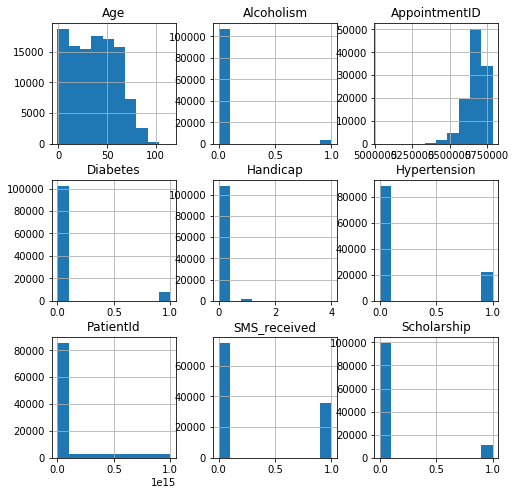

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize= (8, 8)); #exploring data for each coloumn 

In [15]:
df[df['No-show'] == 'No'].count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handicap          88208
SMS_received      88208
No-show           88208
dtype: int64

In [16]:
df[df['No-show']=='Yes'].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handicap          22319
SMS_received      22319
No-show           22319
dtype: int64

In [49]:
def PropByVar(df, variable): #function to calcluate the difference between the Max and Min Show % Dimension
    df_pie = df[variable].value_counts()
    #color = ['yellowgreen' , 'lightskyblue'] #removing this to make the colors dynammic 
    #exlpode = (0.1,0)
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 14);
    ax.set_title(variable + '% (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)


No     79.81
Yes    20.19
Name: No-show, dtype: float64

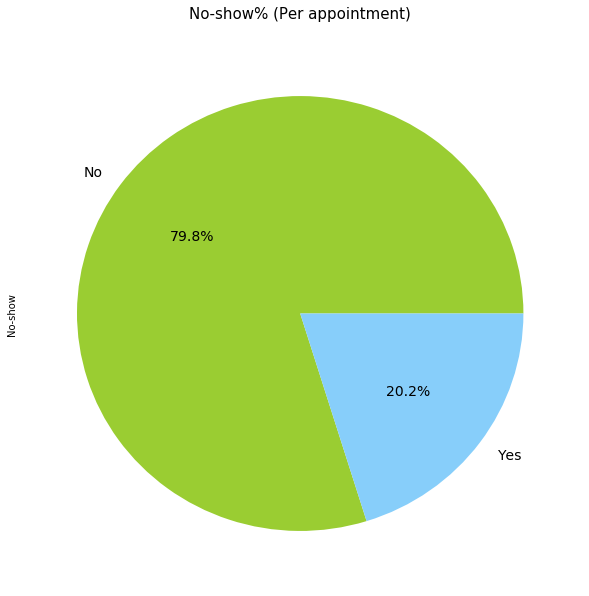

In [37]:
PropByVar(df, 'No-show')

### Research Question 2 What Gender have the most % of no show? 

In [56]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# this function prints a 1d analysis of a variable
def print_1d_analysis(column_name, value, specific_text):
    total = len(df.index)
    total_value = (df[column_name] == value).sum()
    percent = int((total_value / total) * 100)
    text = ' This is ' + str(percent) + '% of ' + str(total) + ' records.'
    print(str(total_value) + ' ' + specific_text + text)
    
print_1d_analysis('Gender', 'M', 'of the appointments is for a man.')
print_1d_analysis('Gender', 'F', 'of the appointments is for a woman.')

38687 of the appointments is for a man. This is 35% of 110527 records.
71840 of the appointments is for a woman. This is 64% of 110527 records.


In [57]:
def print_noshow_percentage(column_name, value, percentage_text):
    total = (df[column_name] == value).sum()
    noshow = len((df[(df[column_name] == value) & (df['No-show'] == 'Yes')]))
    print(int((noshow / total) * 100), percentage_text)

In [58]:
#show % of ppl who don't show based on their gender
print_noshow_percentage('Gender', 'M', '% of all appointments with a man is a no show')
print_noshow_percentage('Gender', 'F', '% of all appointments with a woman is a no show')

19 % of all appointments with a man is a no show
20 % of all appointments with a woman is a no show


## Extra Question Q3: Does not sending an SMS message is a huge reason for patients to not show?

In [59]:
print_1d_analysis('SMS_received', 1, 'of the appointments involves a patient who received an SMS.')
print_noshow_percentage('SMS_received', 1, '% of all appointments with someone who received an SMS is a no show')

35482 of the appointments involves a patient who received an SMS. This is 32% of 110527 records.
27 % of all appointments with someone who received an SMS is a no show


<a id='conclusions'></a>
## Conclusions





## To Summarize:

* The date had typo mistakes that have been corrected, also some data types which were changed successfully.

* The data had no missing values which was GREAT!

* For Q1, we can see that almost 80% of patients did not show up!! which is a big problems were ONLY 20.19% showed up to their appointments..

* For Q2, we can see that woman have the most booked appointments with 64%. For woman, 20% of them are 'no-show', where men are 19% of the total number are 'no-show

* For Q3, well, That is 27% of no-shows under people who received an SMS. As there is no information available on why some patients get an SMS and others not. 

* The limitation that I had are: was not able to add libaraies to Udacity's workshop becuase I did not have admin rights, The 'AppointmentDay' column did not have time all were zeros which will not help me know what are the time range that most patients did show up, since the diseases are 1's and 0's why not make the 'no-show' column also the same so we can deal with them easier than objects, 'PatientId' were very very large numbers why not make them shorter so we can find out what patient has frequint non show appointments, and finally why do some patients have not recived an SMS message is it because their information that we have are not complete or is there another reason.

